<a href="https://colab.research.google.com/github/Ester-Taniya/DI-Bootcamp/blob/main/Week6/Day5/Mini_Project_W6_D5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:

import pandas as pd
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, shapiro

df = pd.read_csv('AAPL.csv')





In [61]:
# show dataset
df.head(10)

,volume,vwap,open,close,high,low,time,transactions
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,1167800400,189737
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,1167886800,136333
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,1167973200,141050
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,1168232400,130547
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,1168318800,569578
5,2.957842e+09,3.4289,3.3839,3.4643,3.4929,3.3375,1168405200,472159
6,1.442127e+09,3.4267,3.4264,3.4214,3.4564,3.3964,1168491600,231996
7,1.312948e+09,3.3663,3.3782,3.3793,3.3950,3.3296,1168578000,212713
8,1.236227e+09,3.4438,3.4171,3.4679,3.4732,3.4089,1168923600,209005
9,1.672192e+09,3.4321,3.4843,3.3911,3.4857,3.3864,1169010000,254029


In [62]:
# Cheack data types
print("\nData types in the data:")
df.dtypes   # or we can use data.info()




Data types in the data:


volume          float64
vwap            float64
open            float64
close           float64
high            float64
low             float64
time              int64
transactions      int64
dtype: object

In [63]:
# Check for null values
print("Null values in the data:")
print(df.isnull().sum())

Null values in the data:
volume          0
vwap            0
open            0
close           0
high            0
low             0
time            0
transactions    0
dtype: int64


In [64]:
df.describe()

,volume,vwap,open,close,high,low,time,transactions
count,4.159000e+03,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4.159000e+03,4.159000e+03
mean,3.662925e+08,46.391382,46.362788,46.396058,46.881127,45.865790,1.428315e+09,2.709318e+05
std,3.724793e+08,50.277557,50.235593,50.293482,50.843874,49.680104,1.505279e+08,2.510859e+05
min,2.422234e+07,2.841000,2.835400,2.792900,2.928600,2.792900,1.167800e+09,3.048700e+04
25%,1.067497e+08,11.936200,11.955700,11.947150,12.028400,11.853600,1.297876e+09,1.128150e+05
50%,2.136463e+08,25.885200,25.775000,25.825000,26.262800,25.680000,1.428466e+09,1.782460e+05
75%,4.965321e+08,52.154150,52.263750,52.231250,52.626250,51.796250,1.558627e+09,3.259555e+05
max,3.373042e+09,193.102000,193.780000,193.970000,194.480000,191.760000,1.689134e+09,2.966979e+06


In [65]:
# Convert 'time' column to datetime format
df['time'] = pd.to_datetime(df['time'])



In [66]:
# Set 'time' as the index
df.set_index('time', inplace=True)

print("\nUpdated dataset with 'time' as the index:")
df.head(10)





Updated dataset with 'time' as the index:


,volume,vwap,open,close,high,low,transactions
time,,,,,,,
1970-01-01 00:00:01.167800400,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,189737
1970-01-01 00:00:01.167886800,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,136333
1970-01-01 00:00:01.167973200,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,141050
1970-01-01 00:00:01.168232400,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,130547
1970-01-01 00:00:01.168318800,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,569578
1970-01-01 00:00:01.168405200,2.957842e+09,3.4289,3.3839,3.4643,3.4929,3.3375,472159
1970-01-01 00:00:01.168491600,1.442127e+09,3.4267,3.4264,3.4214,3.4564,3.3964,231996
1970-01-01 00:00:01.168578000,1.312948e+09,3.3663,3.3782,3.3793,3.3950,3.3296,212713
1970-01-01 00:00:01.168923600,1.236227e+09,3.4438,3.4171,3.4679,3.4732,3.4089,209005


In [67]:
# Explore time series properties
print("\nTime series properties:")
print("Frequency:")
print(df.index.freq)



Time series properties:
Frequency:
None


# The output "Frequency: None" indicates that, based on the information provided, 'time' does not have a specific frequency set.

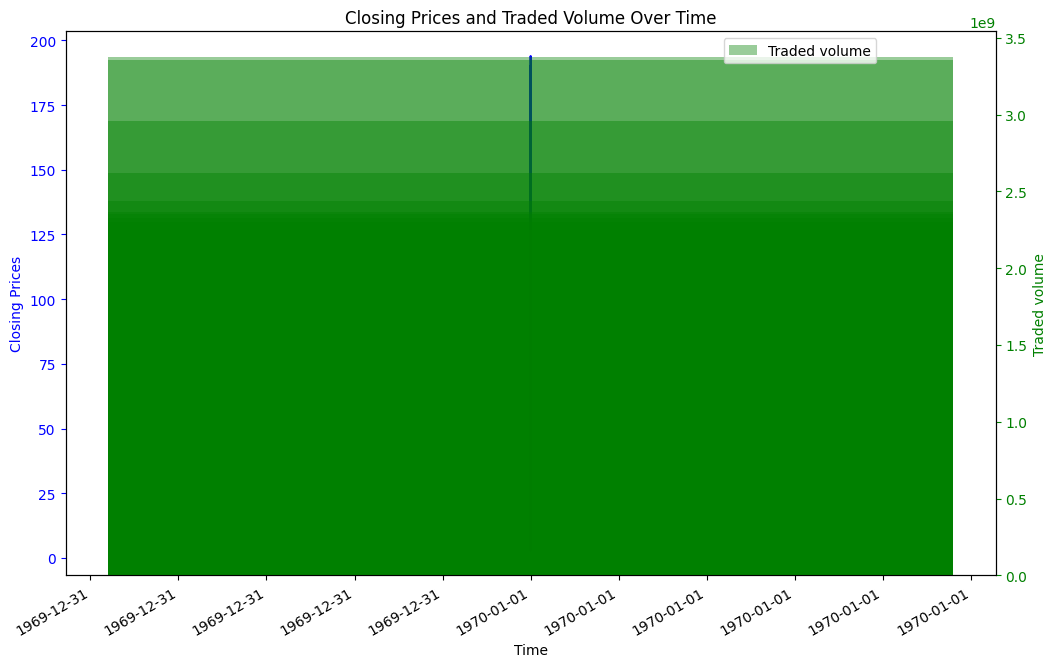

In [74]:
#Trends:

import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Closing Prices graph

plt.figure(figsize=(12, 8))
plt.plot(df.index, df['close'], color='blue', label='Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Prices', color='blue')
plt.tick_params(axis='y', colors='blue')
plt.title('Closing Prices and Traded Volume Over Time')

# Traded volume line
plt.twinx()
plt.bar(df.index, df['volume'], color='green', alpha=0.4, label='Traded volume')
plt.ylabel('Traded volume', color='green')
plt.tick_params(axis='y', colors='green')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()


plt.legend(loc='upper left', bbox_to_anchor=(0.7, 1.0))

plt.show()


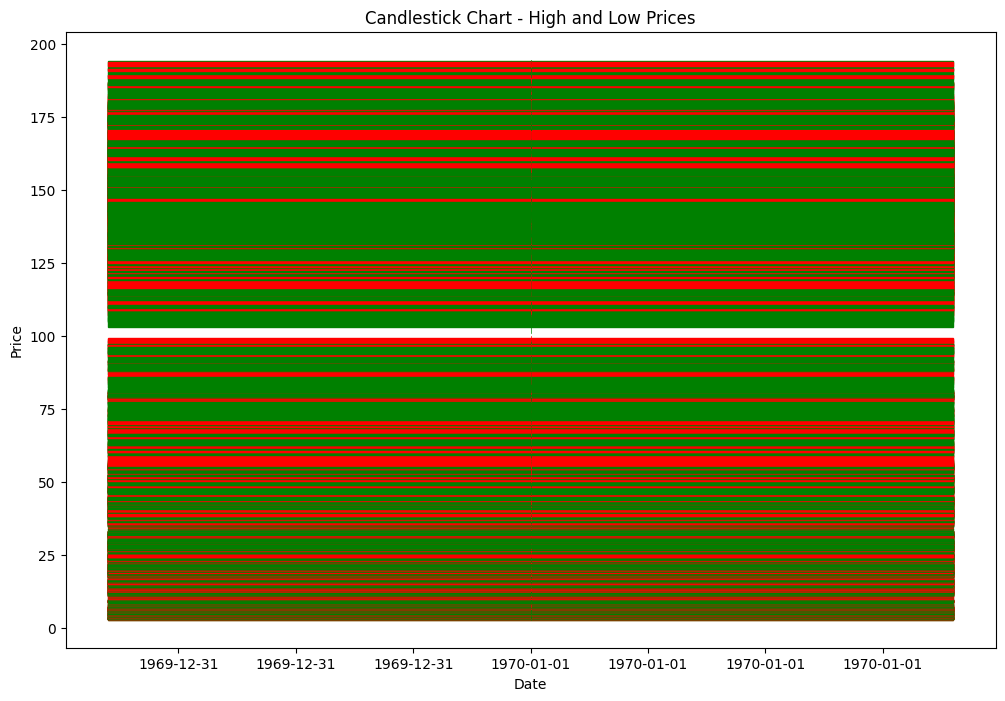

In [80]:

fig, ax = plt.subplots(figsize=(12, 8))

# Convert the datetime index to numerical format for the candlestick chart
df['Date_MPL'] = mdates.date2num(df.index)

# Plot the candlestick chart
candlestick_ohlc(ax, df[['Date_MPL', 'open', 'high', 'low', 'close']].values, width=0.6, colorup='green', colordown='red')

# Convert the x-axis to display dates
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Set title and labels
plt.title('Candlestick Chart - High and Low Prices')
plt.xlabel('Date')
plt.ylabel('Price')

plt.show()


In [85]:

# Compute summary statistics for key columns
df[['open', 'high', 'low', 'close']].describe()


,open,high,low,close
count,4159.000000,4159.000000,4159.000000,4159.000000
mean,46.362788,46.881127,45.865790,46.396058
std,50.235593,50.843874,49.680104,50.293482
min,2.835400,2.928600,2.792900,2.792900
25%,11.955700,12.028400,11.853600,11.947150
50%,25.775000,26.262800,25.680000,25.825000
75%,52.263750,52.626250,51.796250,52.231250
max,193.780000,194.480000,191.760000,193.970000


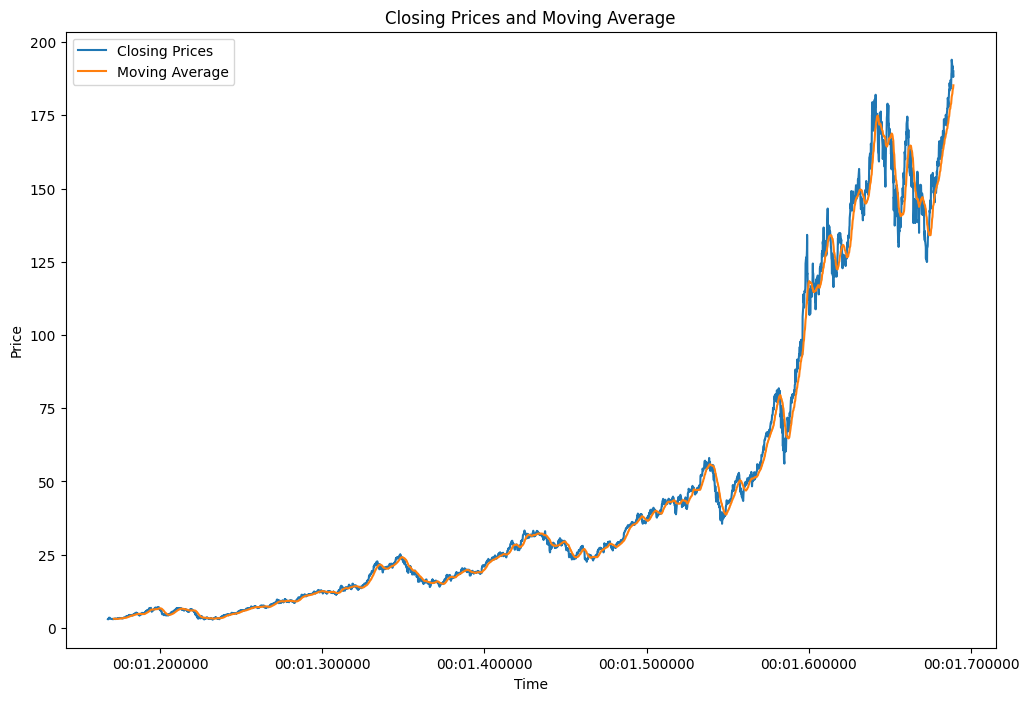

In [87]:

# Calculate the moving average with a window size of 30 days
df['moving_average'] = df['close'].rolling(window=30).mean()

# Plot the closing prices and moving average
plt.figure(figsize=(12, 8))
plt.plot(df.index, df['close'], label='Closing Prices')
plt.plot(df.index, df['moving_average'], label='Moving Average')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Closing Prices and Moving Average')
plt.legend()
plt.show()


In [99]:
print(grouped_data.groups.keys())


dict_keys([1970])


In [108]:
# Execute a t-test to compare average closing prices across different years.

# Group data by year
grouped_data = df.groupby(df.index.year)['close']

print(grouped_data.groups.keys())



dict_keys([1970])


In [ ]:
#if we hawe different yers , we cane mace T trst:
# Extract closing prices for each year
year1_data = grouped_data.get_group(1970)
year2_data = grouped_data.get_group(1969)

# Perform a two-sample t-test
t_statistic, p_value = ttest_ind(year1_data, year2_data)

# Print the results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("There is a statistically significant difference in average closing prices between the two years.")
else:
    print("There is no statistically significant difference in average closing prices between the two years.")


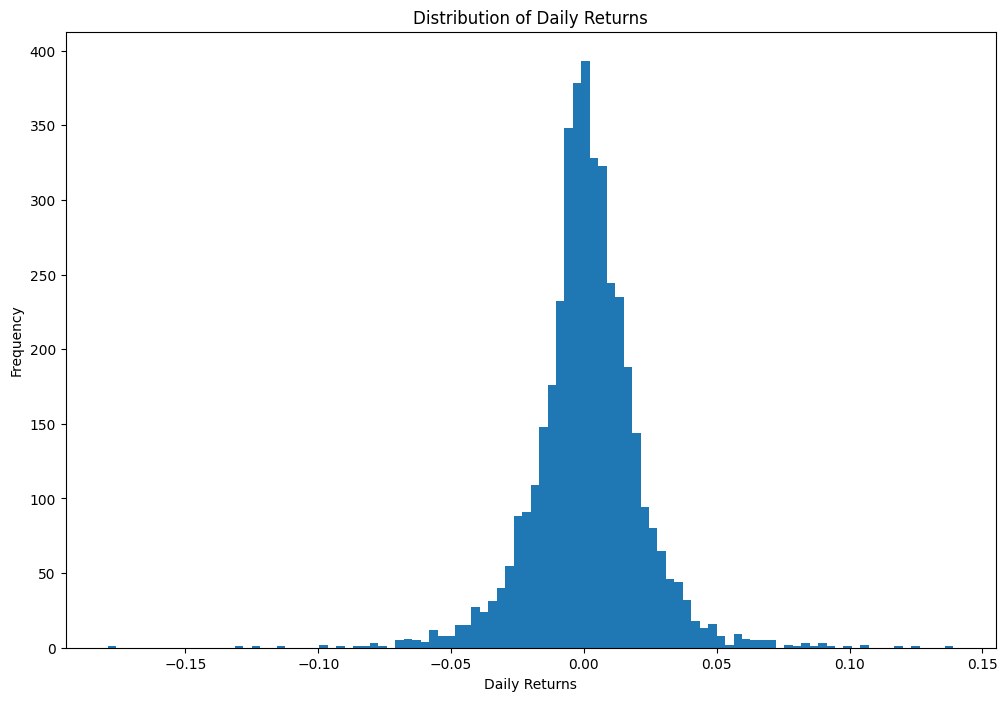

Shapiro-Wilk test statistic: nan
p-value: 1.0
The distribution of daily returns is normally distributed.


In [110]:

# Calculate daily returns
df['daily_returns'] = df['close'].pct_change()

# Plot the distribution of daily returns
plt.figure(figsize=(12, 8))
plt.hist(df['daily_returns'], bins=100)
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Returns')
plt.show()

# Perform the Shapiro-Wilk test for normality
stat, p_value = shapiro(df['daily_returns'])

# Print the results
print("Shapiro-Wilk test statistic:", stat)
print("p-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("The distribution of daily returns is not normally distributed.")
else:
    print("The distribution of daily returns is normally distributed.")
